# Power-law Heisenberg

In [3]:
from eig_overlap import *
from plot_config import *

# from matplotlib.ticker import LogLocator
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['axes.grid'] = True
plt.rc('legend', fontsize=MEDIUM_SIZE-2) 
plt.rc('font', size=MEDIUM_SIZE+4)  # controls default text sizes

fig_dir, data_dir = "./figs", "./data"
prefix, suffix = "interference", "powlaw"

## Error vs Decay rate alpha

In [10]:
## parameters
n = 10
T = n * 2
r = 1000000

In [4]:
x_list, y_list, y1_list, y2_list = [], [], [], []
triangle_bound_list = {}
interference_bound_list = {}
emepricial_error = {}

alpha_list = np.arange(0, 5.5, 0.3)
for alpha in alpha_list:
    H_list = power_law_heisenberg(n, alpha)
    triangle_bound_list[alpha] = triangle_bound(H_list, n, T, r)
    interference_bound_list[alpha] = interference_bound(H_list, n, T, r)
    emepricial_error[alpha] = trotter_error(H_list, n, T, r)
print('triangle_bound_list: ', triangle_bound_list)
print('interference_bound_list: ', interference_bound_list)
print('emepricial_error: ', emepricial_error)

for alpha in triangle_bound_list:
    y_list.append(triangle_bound_list[alpha])
    # x_list.append(alpha)
    y1_list.append(interference_bound_list[alpha])
    y2_list.append(emepricial_error[alpha])

alpha_data = {'alpha': alpha_list, 'triangle_bound': y_list, 'interference_bound': y1_list, 'empirical_error': y2_list}
np.save(f'{data_dir}/{prefix}_n={n}_T={T}_{suffix}.npy', alpha_data)

triangle_bound_list:  {0.0: 0.11939045187953715, 0.3: 0.0720392123750012, 0.6: 0.04694305833582496, 0.8999999999999999: 0.03319455187575447, 1.2: 0.025522403036048864, 1.5: 0.021169021461257084, 1.7999999999999998: 0.018649808134737867, 2.1: 0.017167000232631867, 2.4: 0.01628511303637886, 2.6999999999999997: 0.015759281332517607, 3.0: 0.015448110625634195, 3.3: 0.0152679439467937, 3.5999999999999996: 0.015168123857065842, 3.9: 0.015117394809642477, 4.2: 0.015096243036037852, 4.5: 0.015092431883659826, 4.8: 0.015098308795023007, 5.1: 0.015109134912524193, 5.3999999999999995: 0.01512202858916013}
interference_bound_list:  {0.0: 0.06266273857828916, 0.3: 0.034033201713389125, 0.6: 0.020085236433680445, 0.8999999999999999: 0.012822715580094826, 1.2: 0.008793136571723438, 1.5: 0.0064234511619642885, 1.7999999999999998: 0.00495783774763613, 2.1: 0.004011809402657385, 2.4: 0.0033788107233946145, 2.6999999999999997: 0.002942305012248103, 3.0: 0.002633622372825866, 3.3: 0.0024107017232332982, 3

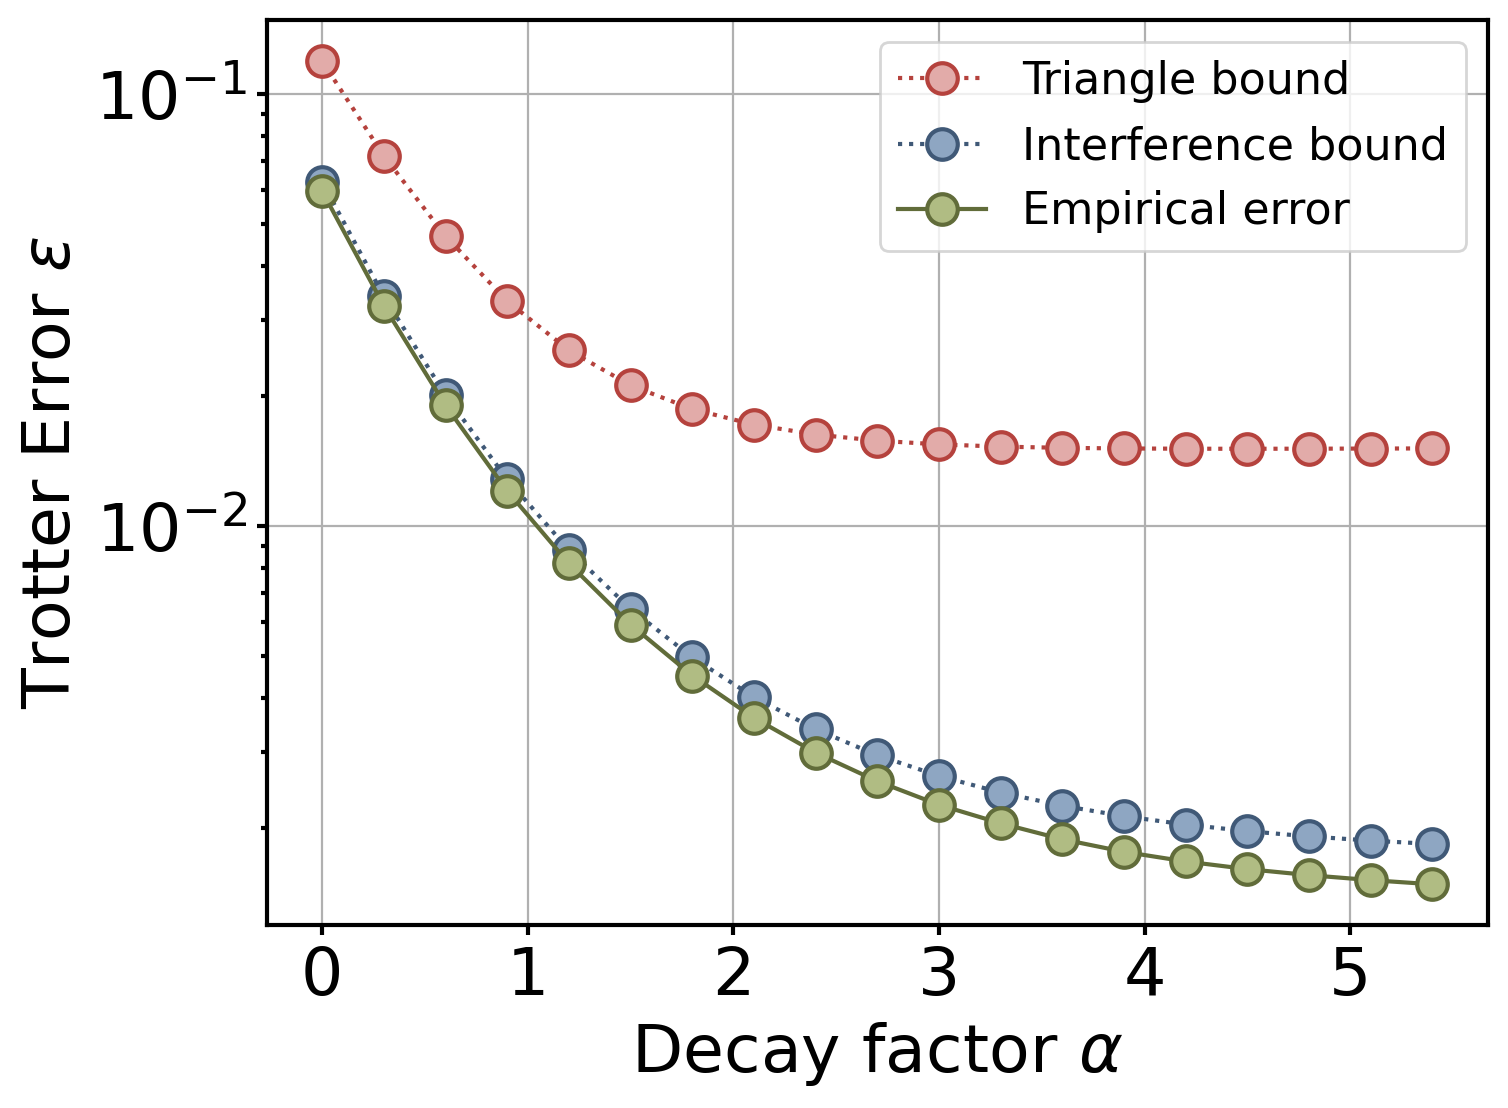

In [11]:
alpha_data = np.load(f'{data_dir}/{prefix}_n={n}_T={T}_{suffix}.npy', allow_pickle=True).item()
alpha_list, y_list, y1_list, y2_list = alpha_data['alpha'], alpha_data['triangle_bound'], alpha_data['interference_bound'], alpha_data['empirical_error']
y2_title, y1_title = "Empirical error", "Interference bound"
x_label, y_label = r"Decay factor $\alpha$", r"Trotter Error $\epsilon$"
y_title = "Triangle bound"
# y_label = r"Trotter error $\epsilon$"

fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=100, layout="tight")
ax.plot(alpha_list, y_list, marker="o", label = y_title, linestyle="dotted")
ax.plot(alpha_list, y1_list, marker="o", label = y1_title, linestyle="dotted")
ax.plot(alpha_list, y2_list, marker="o", label = y2_title)
ax_set_text(ax, x_label, y_label, xticks=[0, 1, 2, 3, 4, 5])
ax.set_yscale("log") # ax.set_xscale("log")
# ax.yaxis.set_major_locator(LogLocator(base=10.0, subs='auto', numticks=10)) # Customize the y-axis ticks
# ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(1, 10) * 0.1, numticks=100)) # minor ticks
plt.savefig(f'{fig_dir}/{prefix}_n={n}_t={T}_{suffix}.pdf', bbox_inches='tight')

## Trotter step r VS n

In [6]:
n_max = 10
alpha = 4
r_min, r_max = 1000, 2000000
eps = 1e-2

In [8]:
x_list, y_list, y1_list, y2_list = [], [], [], []

trotter_error_r = {}
triangle_r = {}
approx_interference_r = {}

interactions = [[Y, X], [X, Z], [X, X]]
for n in range(4, n_max+1):
    print(f'n={n}')
    T = n * 2
    H_list = power_law_heisenberg(n, alpha)
    # H0_list = power_law_heisenberg(n, 10000）
    trotter_error_r[n] = bipartite_search(trotter_error, H_list, n, T, r_min, r_max, eps)
    triangle_r[n] = bipartite_search(triangle_bound, H_list, n, T, r_min, r_max, eps)
    approx_interference_r[n] = bipartite_search(interference_bound, H_list, n, T, r_min, r_max, eps)

print('trotter_error_r: ', trotter_error_r)
print('triangle_r: ', triangle_r)
print('approx_interference_r: ', approx_interference_r)

approx_c,_ = log_linear_regression(approx_interference_r)
triangle_c,_ = log_linear_regression(triangle_r)
trotter_c,_ = log_linear_regression(trotter_error_r)
print(approx_c, triangle_c, trotter_c)

for n in trotter_error_r:
    y_list.append(trotter_error_r[n])
    x_list.append(n)
    y1_list.append(approx_interference_r[n])
    y2_list.append(triangle_r[n])

r_data = {"n": x_list, "Trotter error": y_list, "Interference bound": y1_list, "Triangle bound": y2_list, "approx_c": approx_c, "triangle_c": triangle_c, "trotter_c": trotter_c}
np.save(f'{data_dir}/{prefix}_n={n_max}_t={T}_r_{suffix}.npy', r_data)

n=4
1000 2000000
1000 1000500
1000 500750
1000 250875
1000 125937
1000 63468
1000 32234
16617 32234
16617 24425
16617 20521
16617 18569
17593 18569
17593 18081
17593 17837
17715 17837
17715 17776
17745 17776
17745 17760
17752 17760
17756 17760
17758 17760
1000 2000000
1000 1000500
1000 500750
1000 250875
1000 125937
63468 125937
63468 94702
79085 94702
79085 86893
82989 86893
84941 86893
84941 85917
85429 85917
85429 85673
85551 85673
85612 85673
85612 85642
85612 85627
85619 85627
85623 85627
85625 85627
1000 2000000
1000 1000500
1000 500750
1000 250875
1000 125937
1000 63468
1000 32234
16617 32234
16617 24425
20521 24425
22473 24425
22473 23449
22961 23449
22961 23205
22961 23083
23022 23083
23052 23083
23052 23067
23059 23067
23063 23067
23063 23065
n=5
1000 2000000
1000 1000500
1000 500750
1000 250875
1000 125937
1000 63468
1000 32234
16617 32234
24425 32234
24425 28329
24425 26377
25401 26377
25401 25889
25645 25889
25767 25889
25767 25828
25767 25797
25767 25782
25774 25782
25774

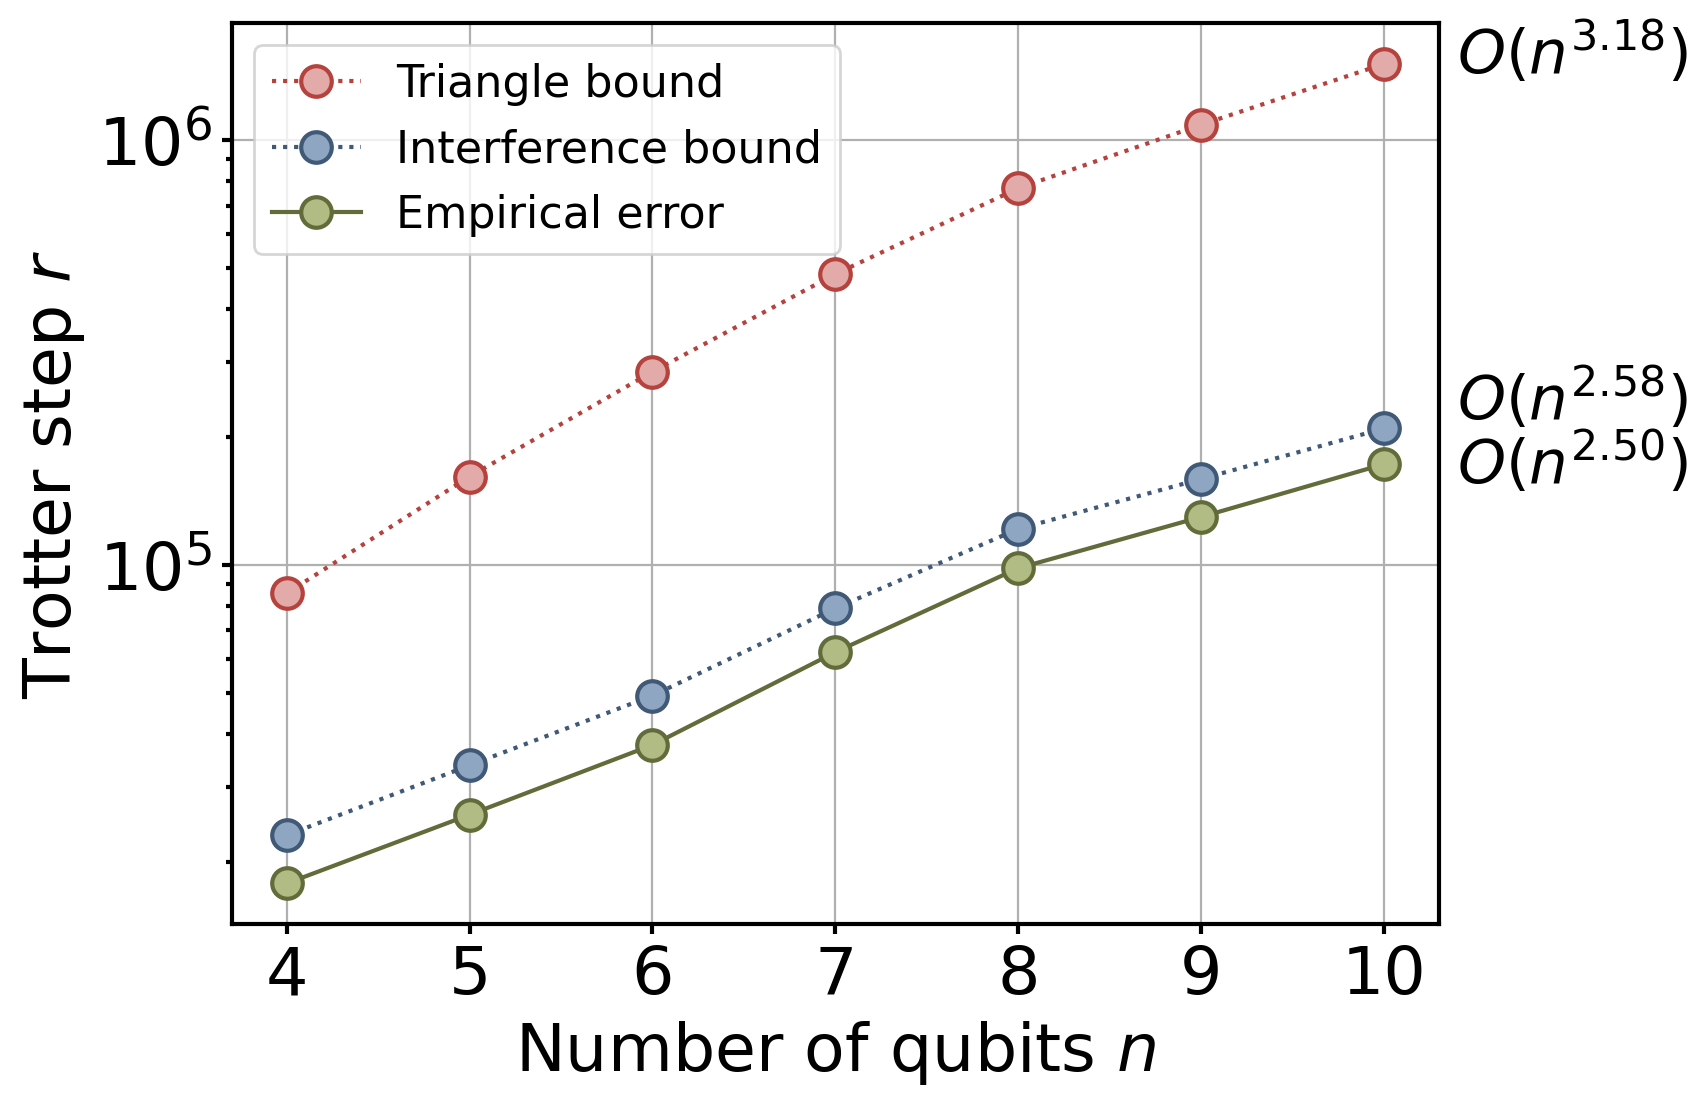

In [13]:
r_data = np.load(f'{data_dir}/{prefix}_n={n_max}_t={T}_r_{suffix}.npy', allow_pickle=True).item()
x_list, y_list, y1_list, y2_list = r_data['n'], r_data['Trotter error'], r_data['Interference bound'], r_data['Triangle bound']
approx_c, triangle_c, trotter_c = r_data['approx_c'], r_data['triangle_c'], r_data['trotter_c']

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(x_list, y2_list, marker="o", label="Triangle bound", linestyle="dotted")
ax.plot(x_list, y1_list, marker="o", label="Interference bound", linestyle="dotted")
ax.plot(x_list, y_list, marker="o", label="Empirical error")
ax_set_text(ax, r"Number of qubits $n$", r"Trotter step $r$", xticks=x_list)
# ax.set_ylim(0, 1.4e6)
ax.set_yscale("log")
# s_triangle = rf"O(n^{{{triangle_c}}})"

# ax.text(x_list[-1], y2_list[-1], rf"$O(n^{{{triangle_c[0]:.2f}}})$", ha='right')
# ax.text(x_list[-1], y1_list[-1], rf"$O(n^{{{trotter_C[0]:.2f}}})$", ha='right')
# ax.text(x_list[-1], y_list[-1], rf"$O(n^{{{approx_c[0]:.2f}}})$", ha='left')
ax.annotate(rf"$O(n^{{{triangle_c[0]:.2f}}})$", (x_list[-1], y2_list[-1]), xytext=(x_list[-1]*1.04, y2_list[-1]*0.95))
ax.annotate(rf"$O(n^{{{trotter_c[0]:.2f}}})$", (x_list[-1], y1_list[-1]), xytext=(x_list[-1]*1.04, y1_list[-1]*1.05))
ax.annotate(rf"$O(n^{{{approx_c[0]:.2f}}})$", (x_list[-1], y_list[-1]), xytext=(x_list[-1]*1.04, y_list[-1]*0.90))

plt.savefig(f'{fig_dir}/{prefix}_alpha={alpha}_n={n_max}_triangle_r_{suffix}.pdf', bbox_inches='tight')